稀疏自编码器
-------------

* 稀疏自动编码器架构图

<img src='pic/9.png'>

* 稀疏自动编码器架构图

<img src='pic/10.png'>

* 稀疏自动编码器架构图

<img src='pic/11.png'>

In [1]:
import numpy as np

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input, regularizers
import matplotlib.pyplot as plt

np.random.seed(33)   # random seed，to reproduce results.


D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
ENCODING_DIM_INPUT = 784
ENCODING_DIM_LAYER1 = 128
ENCODING_DIM_LAYER2 = 64
ENCODING_DIM_LAYER3 = 10
ENCODING_DIM_OUTPUT = 2
EPOCHS = 20
BATCH_SIZE = 64

In [3]:
def train(x_train):

    # input placeholder
    input_image = Input(shape=(ENCODING_DIM_INPUT, ))

    # encoding layer
    # *****this code is changed compared with Autoencoder, adding the activity_regularizer to make the input sparse.
    encode_layer1 = Dense(ENCODING_DIM_LAYER1, activation='relu', activity_regularizer=regularizers.l1(10e-6))(input_image)
    # ******************************
    encode_layer2 = Dense(ENCODING_DIM_LAYER2, activation='relu')(encode_layer1)
    encode_layer3 = Dense(ENCODING_DIM_LAYER3, activation='relu')(encode_layer2)
    encode_output = Dense(ENCODING_DIM_OUTPUT)(encode_layer3)

    # decoding layer
    decode_layer1 = Dense(ENCODING_DIM_LAYER3, activation='relu')(encode_output)
    decode_layer2 = Dense(ENCODING_DIM_LAYER2, activation='relu')(decode_layer1)
    decode_layer3 = Dense(ENCODING_DIM_LAYER1, activation='relu')(decode_layer2)
    decode_output = Dense(ENCODING_DIM_INPUT, activation='tanh')(decode_layer3)

    # build autoencoder, encoder
    autoencoder = Model(inputs=input_image, outputs=decode_output)
    encoder = Model(inputs=input_image, outputs=encode_output)

    # compile autoencoder
    autoencoder.compile(optimizer='adam', loss='mse')

    # training
    autoencoder.fit(x_train, x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True)

    return encoder, autoencoder


In [4]:
def plotRepresentation(encode_images, y_test):
    """
    plot the hidden result.
    :param encode_images: the images after encoding
    :param y_test: the label.
    :return:
    """
    # test and plot
    plt.scatter(encode_images[:, 0], encode_images[:, 1], c=y_test, s=3)
    plt.colorbar()
    plt.show()

def showImages(decode_images, x_test):
    """
    plot the images.
    :param decode_images: the images after decoding
    :param x_test: testing data
    :return:
    """
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        ax.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        ax.imshow(decode_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Epoch 1/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0615
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0527
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0489
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0473
Epoch 5/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0464
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0458
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0454
Epoch 8/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0451
Epoch 9/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0447
Epoch 10/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0445
Epoch 11/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0445
Epoch 12/20
60000/60000 [===========================

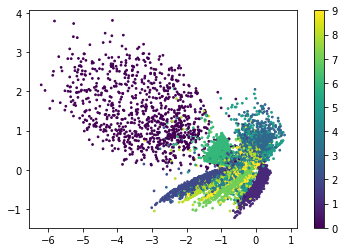

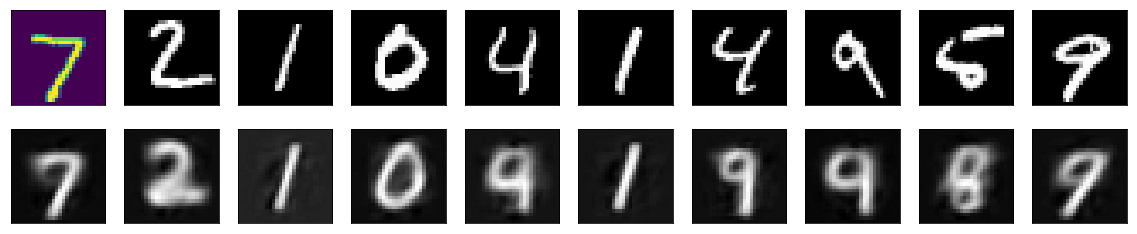

In [5]:
if __name__ == '__main__':
    # Step1： load data  x_train: (60000, 28, 28), y_train: (60000,) x_test: (10000, 28, 28), y_test: (10000,)
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Step2: normalize
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    # Step3: reshape data, x_train: (60000, 784), x_test: (10000, 784), one row denotes one sample.
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))

    # Step4： train
    encoder, autoencoder = train(x_train=x_train)

    # test and plot
    encode_images = encoder.predict(x_test)
    plotRepresentation(encode_images, y_test)

    # show images
    decode_images = autoencoder.predict(x_test)
    showImages(decode_images, x_test)